In [85]:
import random, csv, time, os, pickle, re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.stats import bernoulli
from scipy.io import savemat

%matplotlib inline

In [47]:
def R2(yhat, y):
    
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    r2 = ssreg / sstot

    return r2

def matching_func(param, video_score, w_hat):
    return np.linalg.norm(video_score - param[0]*np.array(w_hat) - param[1])

def regularized_vector(video_score,w_hat):
    coeff = optimize.minimize(matching_func, [0, 0], args=(video_score, w_hat))

    a = coeff['x'][0]
    b = coeff['x'][1]
    v = a*np.array(w_hat)+b
    return v


def compare_rank(video_score, results, verbose=False, hist=True):
    true_order = np.array(video_score).argsort()
    true_ranks = true_order.argsort()

    temp_o = np.array(results).argsort()
    temp_r = temp_o.argsort()

    resolution = 0.1
    video_score_results = np.round(np.array(results)/resolution)*resolution
    
    if verbose:
        print 'Result Order \t True Order \t Result Score \t Ture Score'
        for i in range(len(temp_r)):
            print temp_r[i], '\t\t', true_ranks[i], '\t\t', video_score_results[i], '\t\t', video_score[i]
            
    if hist:
        diff = np.abs(temp_r - true_ranks)
        plt.hist(diff, alpha=0.5)

In [107]:
path = './result/'
files = [f for f in os.listdir(path) if f.endswith('.p') and 'sigma' not in f]

In [108]:
results = dict()
path = './result/'

for f in files:
    n, p, _ = re.findall( r'\d+\.*\d*', f )
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    if n not in results.keys():
        results[n] = dict()
    if p not in results[n].keys():
        results[n][p] = []
    results[n][p].append(R2(w_hat, w_star))

In [109]:
results['10000']

{'10000': [0.49998482196271282,
  0.49834772651348158,
  0.49998482196271282,
  0.49998482196271282,
  0.50854863294008779],
 '199864': [0.95254737383726606],
 '276310': [0.96457319960067645],
 '92103': [0.89686130314109125,
  0.89625937036341363,
  0.89686130314109125,
  0.89686130314109125,
  0.89765519201275634]}

In [82]:
video_nums = [625,1250,2500,5000,10000,20000]
num_edges_pct = [0.1, 1, 2.17, 3]

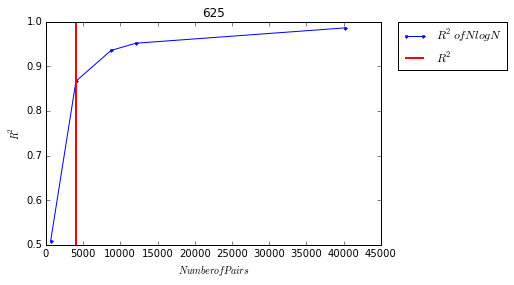

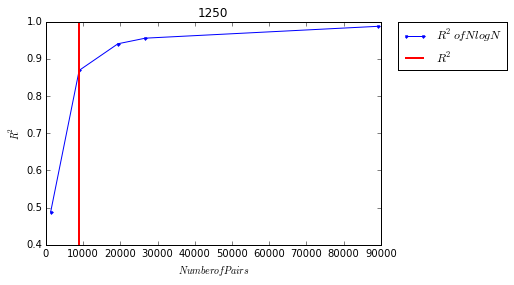

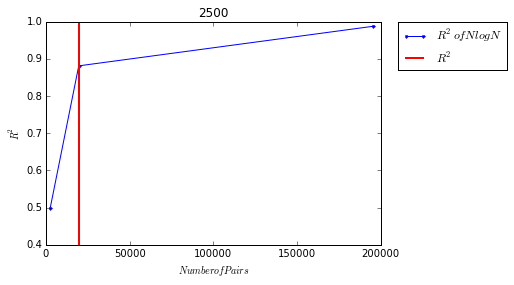

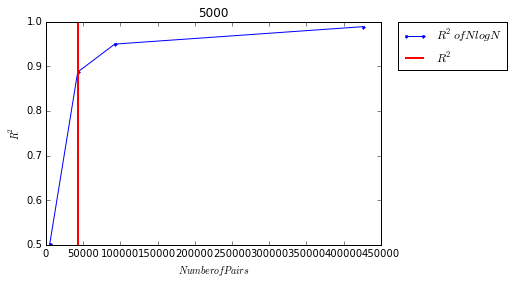

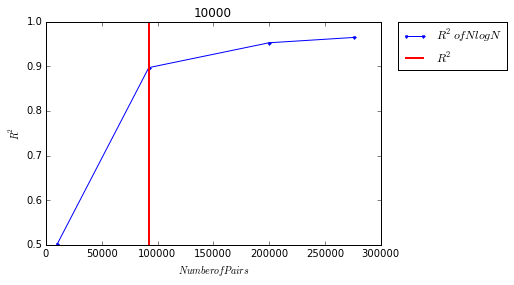

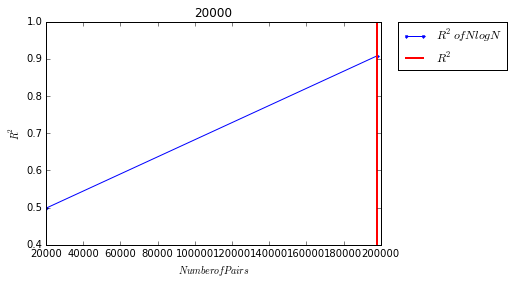

In [100]:
for video_num in video_nums:
    keys_str = results[str(video_num)].keys()
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(np.mean(results[str(video_num)][str(key)]))
        
    plt.figure()
    plt.plot(edges, r2,'.-')
    plt.title(str(video_num))
    plt.ylabel('$R^2$')
    plt.xlabel('$Number of Pairs$')
    plt.axvline(x=thresh,linewidth=2, color='r')
    plt.legend({'$R^2 of NlogN$', '$R^2$'},bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [101]:
path = './result/'
files = [f for f in os.listdir(path) if f.endswith('.p') and 'sigma' in f]

In [103]:
results = dict()
path = './result/'

for f in files:
    _, n, p, _ = re.findall( r'\d+\.*\d*', f )
    fname = os.path.join(path, f)
    temp = pickle.load( open( fname, "rb" ) )
    w_star = temp['video_score']
    w_hat_raw = temp['x']
    w_hat = regularized_vector(w_star,w_hat_raw)
    if n not in results.keys():
        results[n] = dict()
    if p not in results[n].keys():
        results[n][p] = []
    results[n][p].append(R2(w_hat, w_star))

In [104]:
video_nums = [625,1250,2500,5000,10000,20000]
num_edges_pct = [0.1, 1, 2.17, 3]

KeyError: '10000'

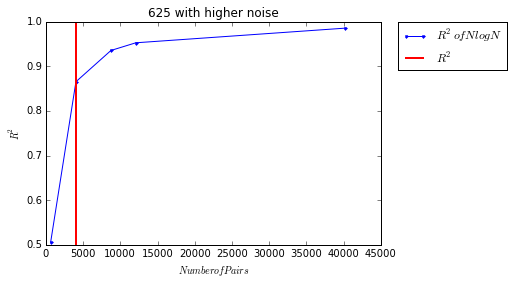

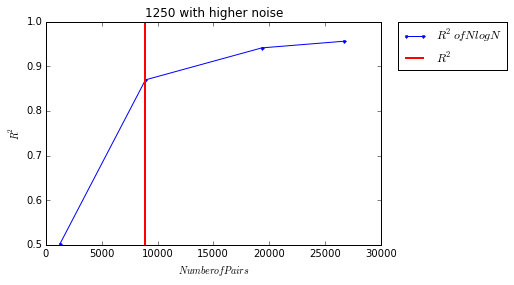

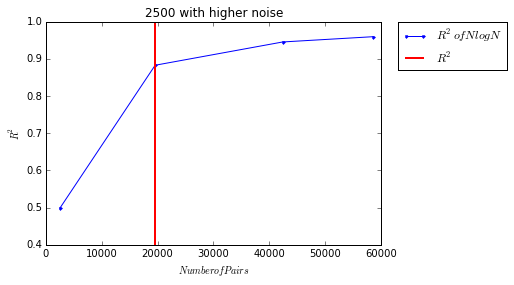

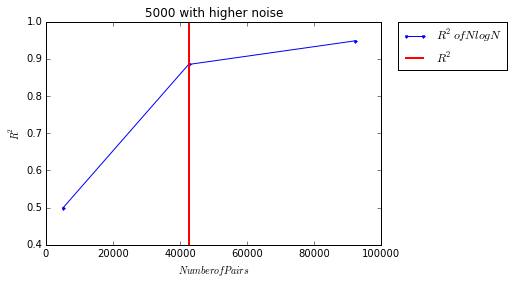

In [106]:
for video_num in video_nums:
    keys_str = results[str(video_num)].keys()
    keys = np.sort(np.array(keys_str).astype(int))
    r2 = []
    edges = []
    thresh = video_num*np.log(video_num)
    for key in keys:
        edges.append(key)
        r2.append(np.mean(results[str(video_num)][str(key)]))
        
    plt.figure()
    plt.plot(edges, r2,'.-')
    plt.title(str(video_num)+' with higher noise')
    plt.ylabel('$R^2$')
    plt.xlabel('$Number of Pairs$')
    plt.axvline(x=thresh,linewidth=2, color='r')
    plt.legend({'$R^2 of NlogN$', '$R^2$'},bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)